In [1]:
# loading modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

In [7]:
# loading dhe data
Brain = pd.read_csv("Birds includes whole brain numbers 17 09 2024.csv")
# Brain = Brain.drop(['Unnamed: 0'], axis=1)
Brain.head(85)

,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Namaqua dove,Columbiformes,Columbidae,0.240,0.0870,0.555,"14,167,000","59,533,000","94,490,000",31.850
2,Common ground dove,Columbiformes,Columbidae,0.246,0.0750,0.572,"17,602,000","51,380,000","89,630,000",35.277
3,Diamond dove,Columbiformes,Columbidae,0.240,0.0776,0.545,"18,209,000","54,101,000","87,879,000",39.930
4,King quail,Galliformes,Phasianidae,0.220,0.0717,0.521,"20,523,000","42,945,000","80,478,000",43.810
...,...,...,...,...,...,...,...,...,...,...
80,Cockatiel,Psittaciformes,Cacatuidae,1.368,0.1960,2.205,"258,000,000","129,000,000","452,766,000",90.000
81,Greylag goose,Anseriformes,Anatidae,6.710,1.2260,10.829,"258,650,000","420,729,000","735,359,000",2943.930
82,Steppe eagle,Accipitriformes,Accipitridae,7.150,1.6970,12.279,"288,470,000","682,506,000","1,106,000,000",3350.000
83,Black kite,Accipitriformes,Accipitridae,3.715,0.8760,6.622,"301,980,000","426,176,000","825,990,000",835.700


In [8]:
# Dropping NaN values
Brain = Brain.dropna().reset_index(drop=True)

In [9]:
# Converting into float and removing commas
if Brain['Forebrain n'].dtype != 'float64':
     Brain['Forebrain n'] = Brain['Forebrain n'].str.replace(',', '').astype(float)
if Brain['Cerebellum n'].dtype != 'float64':
     Brain['Cerebellum n'] = Brain['Cerebellum n'].str.replace(',', '').astype(float)
if Brain['Whole brain n'].dtype != 'float64':
     Brain['Whole brain n'] = Brain['Whole brain n'].str.replace(',', '').astype(float)

In [10]:
Brain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Animal         129 non-null    object 
 1   Order          129 non-null    object 
 2   Family         129 non-null    object 
 3   Forebrain m    129 non-null    float64
 4   Cerebellum m   129 non-null    float64
 5   Whole brain m  129 non-null    float64
 6   Forebrain n    129 non-null    float64
 7   Cerebellum n   129 non-null    float64
 8   Whole brain n  129 non-null    float64
 9   Body m         129 non-null    float64
dtypes: float64(7), object(3)
memory usage: 10.2+ KB


In [11]:
# Getting relative cortical and cerebellar masses and relative number of neurons in each structure
Brain['Forebrain m r %'] = Brain['Forebrain m']/Brain['Whole brain m']*100
Brain['Cerebellum m r %'] = Brain['Cerebellum m']/Brain['Whole brain m']*100
Brain['Forebrain n r %'] = Brain['Forebrain n']/Brain['Whole brain n']*100
Brain['Cerebellum n r %'] = Brain['Cerebellum n']/Brain['Whole brain n']*100

In [12]:
# Getting neuron densities in a miligram of structure
Brain['Forebrain n d'] = Brain['Forebrain n']/(Brain['Forebrain m']*1000)
Brain['Cerebellum n d'] = Brain['Cerebellum n']/(Brain['Cerebellum m']*1000)
Brain['Whole brain n d'] = Brain['Whole brain n']/(Brain['Whole brain m']*1000)

In [13]:
# Brain mass per body mass
Brain['Forebrain m per body m'] = Brain['Forebrain m']/Brain['Body m']*100
Brain['Cerebellum m per body m'] = Brain['Cerebellum m']/Brain['Body m']*100
Brain['Whole brain m per body m'] = Brain['Whole brain m']/Brain['Body m']*100

In [14]:
# Number of neurons per body mass
Brain['Forebrain n per body m'] = Brain['Forebrain n']/Brain['Body m']
Brain['Cerebellum n per body m'] = Brain['Cerebellum n']/Brain['Body m']
Brain['Whole brain n per body m'] = Brain['Whole brain n']/Brain['Body m']

In [15]:
Breng = Brain
Breng.head()

,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m,...,Cerebellum n r %,Forebrain n d,Cerebellum n d,Whole brain n d,Forebrain m per body m,Cerebellum m per body m,Whole brain m per body m,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m
0,Namaqua dove,Columbiformes,Columbidae,0.240,0.0870,0.555,14167000.0,59533000.0,94490000.0,31.850,...,63.004551,59029.166667,684287.356322,170252.252252,0.753532,0.273155,1.742543,444803.767661,1.869168e+06,2.966719e+06
1,Common ground dove,Columbiformes,Columbidae,0.246,0.0750,0.572,17602000.0,51380000.0,89630000.0,35.277,...,57.324557,71552.845528,685066.666667,156695.804196,0.697338,0.212603,1.621453,498965.331519,1.456473e+06,2.540749e+06
2,Diamond dove,Columbiformes,Columbidae,0.240,0.0776,0.545,18209000.0,54101000.0,87879000.0,39.930,...,61.563058,75870.833333,697177.835052,161245.871560,0.601052,0.194340,1.364889,456023.040321,1.354896e+06,2.200826e+06
3,King quail,Galliformes,Phasianidae,0.220,0.0717,0.521,20523000.0,42945000.0,80478000.0,43.810,...,53.362410,93286.363636,598953.974895,154468.330134,0.502168,0.163661,1.189226,468454.690710,9.802556e+05,1.836978e+06
4,Common quail,Galliformes,Phasianidae,0.360,0.1090,0.787,22568000.0,75198000.0,117760000.0,94.860,...,63.856997,62688.888889,689889.908257,149631.512071,0.379507,0.114906,0.829644,237908.496732,7.927261e+05,1.241408e+06


In [16]:
pd.set_option('display.max_columns', None)
Breng.describe()

,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m,Forebrain m r %,Cerebellum m r %,Forebrain n r %,Cerebellum n r %,Forebrain n d,Cerebellum n d,Whole brain n d,Forebrain m per body m,Cerebellum m per body m,Whole brain m per body m,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m
count,129.000000,129.000000,129.000000,1.290000e+02,1.290000e+02,1.290000e+02,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,1.290000e+02,129.000000,129.000000,129.000000,129.000000,1.290000e+02,1.290000e+02,1.290000e+02
mean,3.341624,0.620022,5.404403,3.109492e+08,2.830096e+08,6.706423e+08,2245.798372,57.473101,12.076602,38.714025,48.353096,104826.714049,5.830571e+05,151442.134835,0.907357,0.170312,1.531883,1.345418e+06,1.249927e+06,3.014664e+06
std,3.704900,0.708397,5.571436,3.641944e+08,1.993004e+08,5.666749e+08,11382.286756,8.703180,2.862982,15.178873,13.658651,64014.899952,2.217501e+05,65757.927366,0.810024,0.143063,1.310301,1.762208e+06,1.604332e+06,3.860640e+06
min,0.176000,0.040000,0.357000,1.416700e+07,4.294500e+07,8.047800e+07,5.600000,42.226488,6.005789,14.993121,17.521696,18741.594996,1.826565e+05,40473.055231,0.021308,0.004832,0.033527,3.993419e+03,8.826089e+03,1.356935e+04
25%,0.880000,0.221000,1.840000,7.200000e+07,1.331080e+08,2.582170e+08,113.120000,49.708405,10.000000,26.355973,38.895588,55043.333333,4.309113e+05,100815.580618,0.281643,0.070719,0.570324,1.521225e+05,3.058448e+05,5.523477e+05
50%,2.240000,0.450000,3.763000,1.497090e+08,2.203140e+08,4.795240e+08,368.600000,58.292232,12.731196,36.559765,51.238230,81286.675639,5.408321e+05,139925.299095,0.568720,0.118996,1.039193,4.691055e+05,6.421288e+05,1.354102e+06
75%,4.120000,0.825000,7.076000,3.988990e+08,4.034100e+08,9.178760e+08,867.500000,63.301191,14.031303,48.755760,59.835975,143073.556640,6.965390e+05,182342.884662,1.357895,0.221154,2.234902,2.063808e+06,1.524390e+06,3.996251e+06
max,25.580000,5.800900,40.249000,1.916000e+09,1.059572e+09,3.136000e+09,120050.000000,76.332637,20.620843,76.491228,72.386671,363636.363636,1.650000e+06,459030.812325,3.288690,0.714286,6.375000,1.142857e+07,1.178571e+07,2.926321e+07


In [17]:
Breng.shape

(129, 23)

In [18]:
pd.set_option('display.max_rows', 170)
Breng.head(170)

,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m,Forebrain m r %,Cerebellum m r %,Forebrain n r %,Cerebellum n r %,Forebrain n d,Cerebellum n d,Whole brain n d,Forebrain m per body m,Cerebellum m per body m,Whole brain m per body m,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m
0,Namaqua dove,Columbiformes,Columbidae,0.24000,0.0870,0.555,1.416700e+07,5.953300e+07,9.449000e+07,31.850,43.243243,15.675676,14.993121,63.004551,59029.166667,6.842874e+05,170252.252252,0.753532,0.273155,1.742543,4.448038e+05,1.869168e+06,2.966719e+06
1,Common ground dove,Columbiformes,Columbidae,0.24600,0.0750,0.572,1.760200e+07,5.138000e+07,8.963000e+07,35.277,43.006993,13.111888,19.638514,57.324557,71552.845528,6.850667e+05,156695.804196,0.697338,0.212603,1.621453,4.989653e+05,1.456473e+06,2.540749e+06
2,Diamond dove,Columbiformes,Columbidae,0.24000,0.0776,0.545,1.820900e+07,5.410100e+07,8.787900e+07,39.930,44.036697,14.238532,20.720536,61.563058,75870.833333,6.971778e+05,161245.871560,0.601052,0.194340,1.364889,4.560230e+05,1.354896e+06,2.200826e+06
3,King quail,Galliformes,Phasianidae,0.22000,0.0717,0.521,2.052300e+07,4.294500e+07,8.047800e+07,43.810,42.226488,13.761996,25.501379,53.362410,93286.363636,5.989540e+05,154468.330134,0.502168,0.163661,1.189226,4.684547e+05,9.802556e+05,1.836978e+06
4,Common quail,Galliformes,Phasianidae,0.36000,0.1090,0.787,2.256800e+07,7.519800e+07,1.177600e+08,94.860,45.743329,13.850064,19.164402,63.856997,62688.888889,6.898899e+05,149631.512071,0.379507,0.114906,0.829644,2.379085e+05,7.927261e+05,1.241408e+06
5,Common emerald dove,Columbiformes,Columbidae,0.49400,0.1760,1.126,2.714800e+07,1.098180e+08,1.684890e+08,119.640,43.872114,15.630551,16.112625,65.178142,54955.465587,6.239659e+05,149634.991119,0.412905,0.147108,0.941157,2.269141e+05,9.179037e+05,1.408300e+06
6,Common bronzewing,Columbiformes,Columbidae,0.86900,0.2570,1.848,3.407700e+07,1.452080e+08,2.167030e+08,306.025,47.023810,13.906926,15.725209,67.007840,39214.039125,5.650117e+05,117263.528139,0.283964,0.083980,0.603872,1.113536e+05,4.744972e+05,7.081219e+05
7,Pink-necked green pigeon,Columbiformes,Columbidae,0.64500,0.2000,1.339,3.435700e+07,1.147920e+08,1.744760e+08,128.850,48.170276,14.936520,19.691534,65.792430,53266.666667,5.739600e+05,130303.211352,0.500582,0.155219,1.039193,2.666434e+05,8.908964e+05,1.354102e+06
8,Grey partridge,Galliformes,Phasianidae,0.74000,0.2071,1.565,3.688200e+07,1.075460e+08,1.702870e+08,337.330,47.284345,13.233227,21.658729,63.155731,49840.540541,5.192950e+05,108809.584665,0.219370,0.061394,0.463937,1.093351e+05,3.188154e+05,5.048083e+05
9,Yellow-rumped tinkerbird,Piciformes,Lybiidae,0.22470,0.0700,0.470,3.792500e+07,6.283000e+07,1.180300e+08,11.200,47.808511,14.893617,32.131661,53.232229,168780.596351,8.975714e+05,251127.659574,2.006250,0.625000,4.196429,3.386161e+06,5.609821e+06,1.053839e+07


In [19]:
X00 = Breng['Forebrain m']
Y00 = Breng["Forebrain n"]
X01 = Breng['Cerebellum m']
Y01 = Breng["Cerebellum n"]
X02 = Breng['Forebrain m r %']
Y02 = Breng["Forebrain n r %"]
X03 = Breng['Cerebellum m r %']
Y03 = Breng["Cerebellum n r %"]
Y04 = Breng["Body m"]
x05 = Breng['Forebrain n d']

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

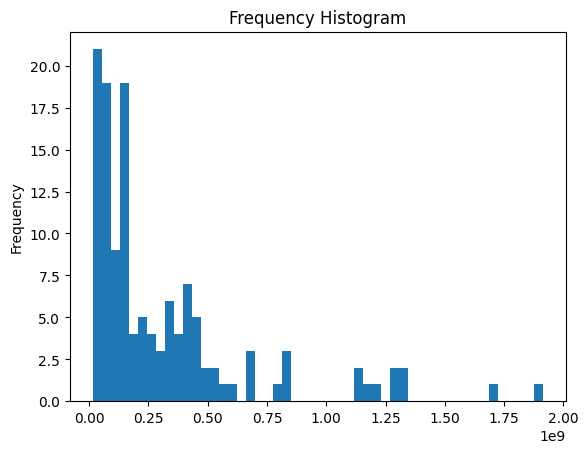

In [20]:
plt.hist(Y00, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

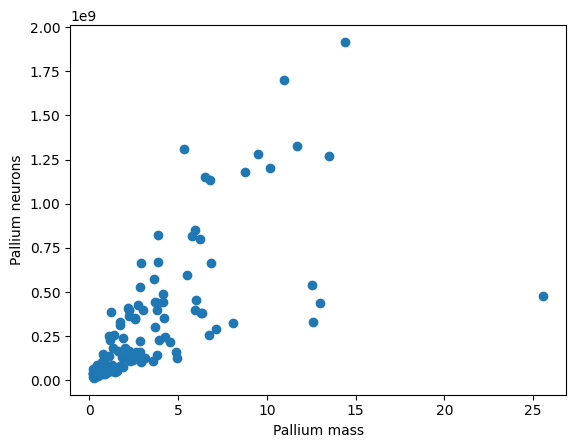

In [21]:
plt.scatter(X00, Y00)
plt.xlabel('Pallium mass')
plt.ylabel('Pallium neurons')
plt.show()

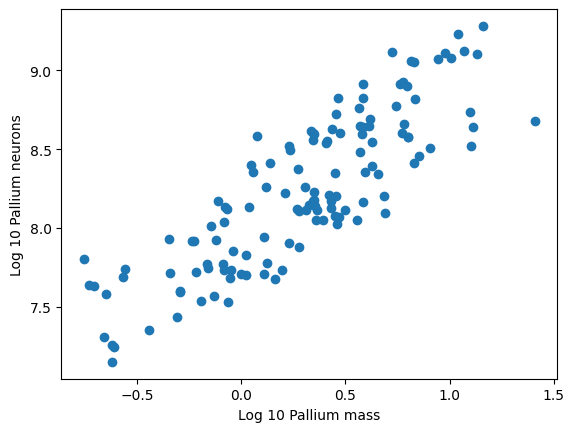

In [22]:
plt.scatter(np.log10(X00), np.log10(Y00))
plt.xlabel('Log 10 Pallium mass')
plt.ylabel('Log 10 Pallium neurons')
plt.show()

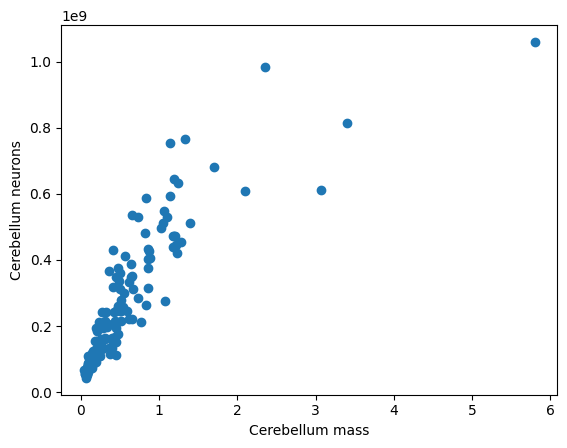

In [23]:
plt.scatter(X01, Y01)
plt.xlabel('Cerebellum mass')
plt.ylabel('Cerebellum neurons')
plt.show()

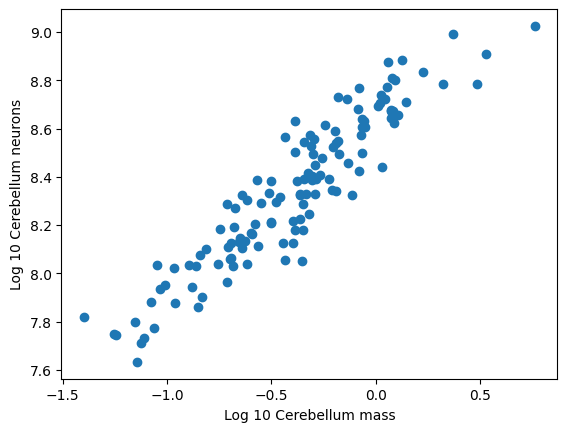

In [24]:
plt.scatter(np.log10(X01), np.log10(Y01))
plt.xlabel('Log 10 Cerebellum mass')
plt.ylabel('Log 10 Cerebellum neurons')
plt.show()

<Axes: xlabel='Forebrain m', ylabel='Forebrain n'>

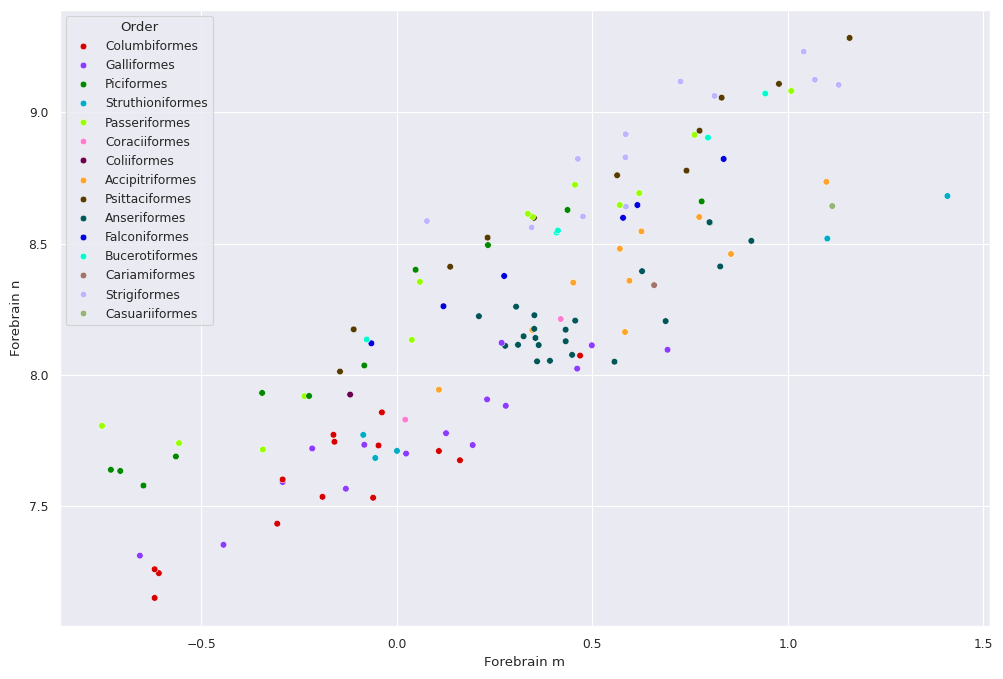

In [27]:
sns.set("paper", rc={"figure.figsize": (12, 8)})
palette = sns.color_palette(cc.glasbey, n_colors=15)
sns.scatterplot(data=Breng, x=np.log10(X00), y=np.log10(Y00), hue='Order', palette=palette)

<Axes: xlabel='Forebrain m', ylabel='Forebrain n d'>

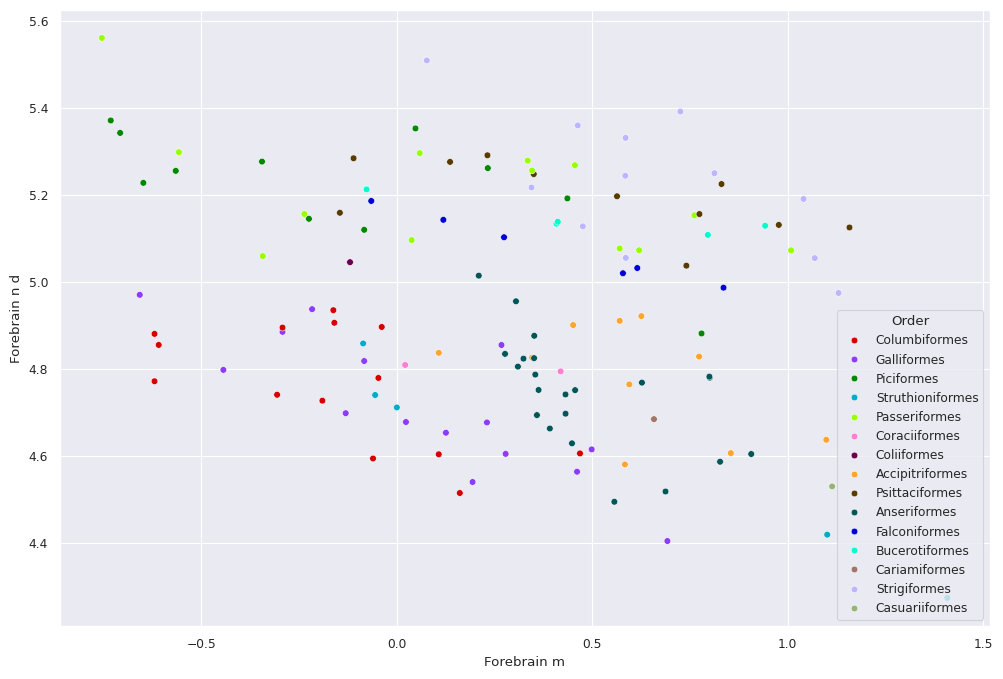

In [28]:
sns.scatterplot(data=Breng, x=np.log10(X00), y=np.log10(x05), hue='Order', palette=palette)

In [29]:
# Saving modified data
Breng.to_csv('/content/birds with feature engineering 17 09 2024.csv')

<Axes: xlabel='Forebrain m', ylabel='Forebrain n d'>

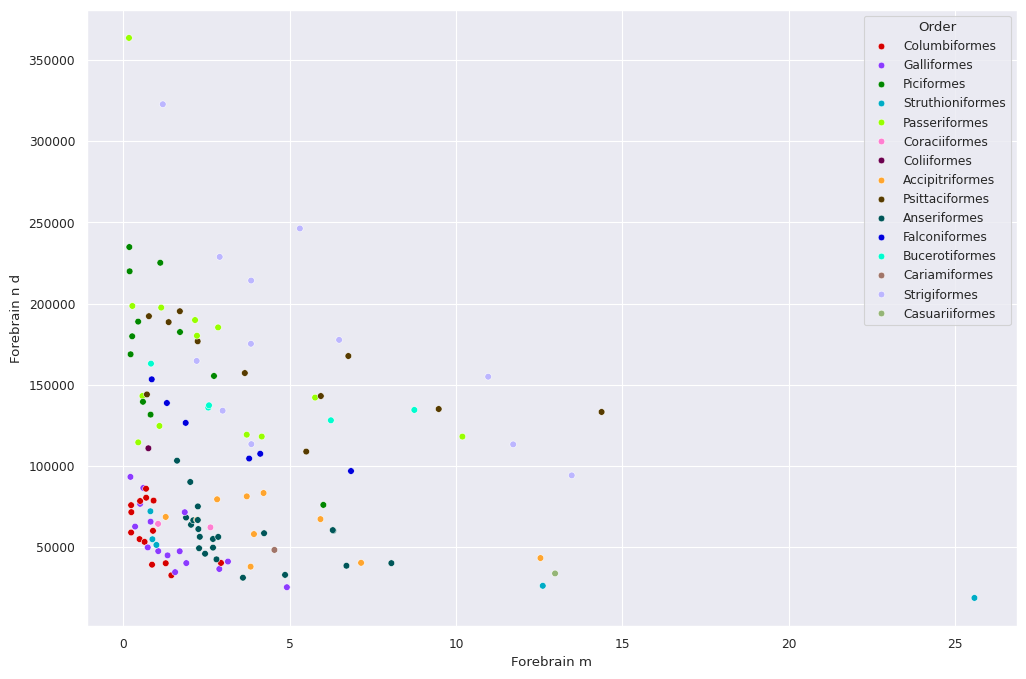

In [30]:
sns.scatterplot(data=Breng, x=X00, y=x05, hue='Order', palette=palette)

<Axes: xlabel='Order', ylabel='Count'>

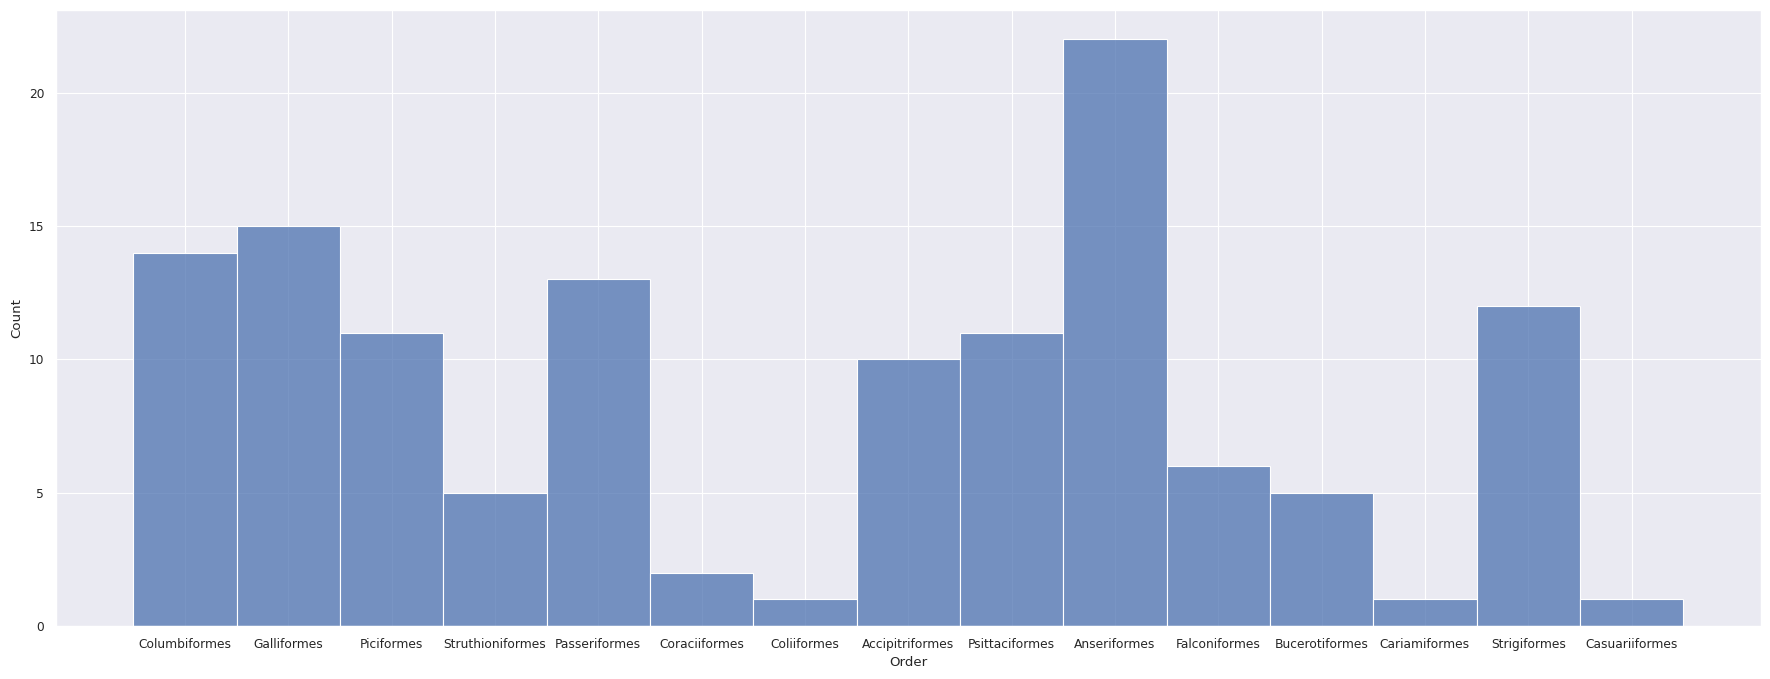

In [25]:
sns.set("paper", rc={"figure.figsize": (22, 8)})
sns.histplot(data=Breng, x="Order")

In [31]:
matrix = Breng.corr(numeric_only=True)

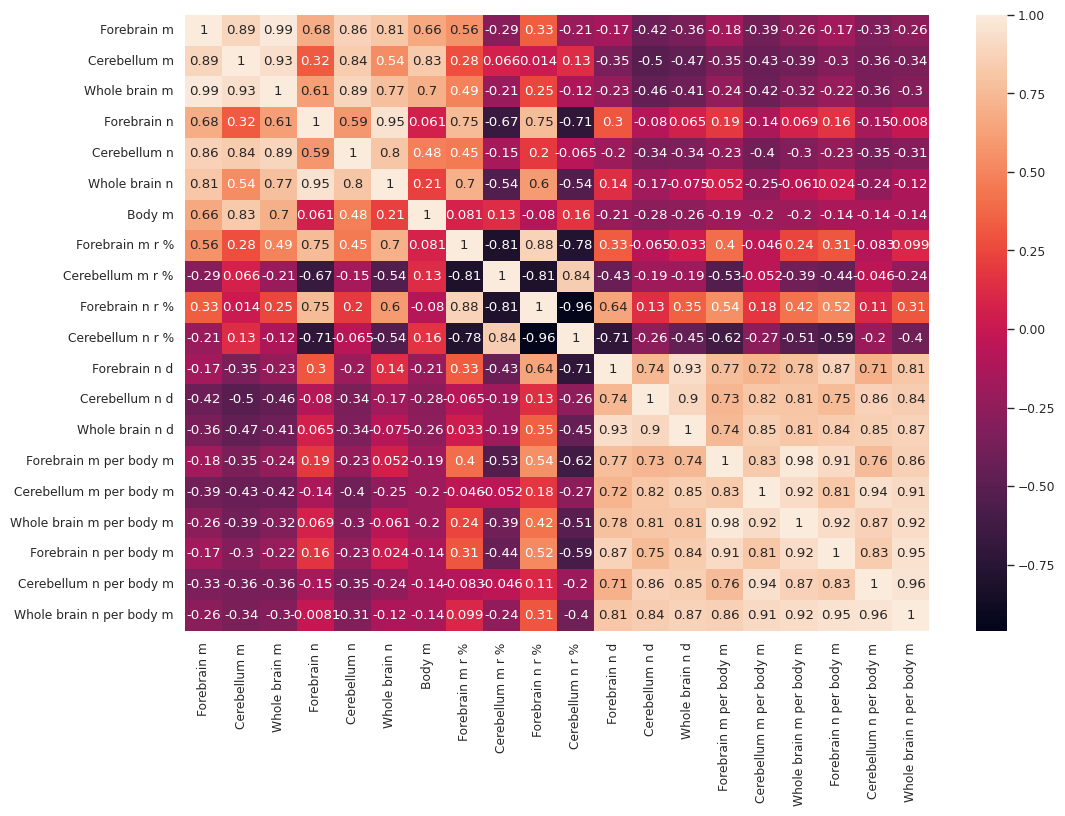

In [32]:
sns.heatmap(matrix, annot=True);

In [34]:
X = Breng[["Forebrain m", "Cerebellum m", "Whole brain m", "Body m", "Forebrain m r %", "Cerebellum m r %", "Forebrain m per body m",
          "Cerebellum m per body m", "Whole brain m per body m"]]
Y1 = Breng["Forebrain n"]
Y2 = Breng["Cerebellum n"]
Y3 = Breng["Whole brain n"]

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [36]:
x_train, x_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, Y1, Y2, test_size=0.25, random_state=42)

In [37]:
regr_forebrain = RandomForestRegressor(random_state=42)


In [38]:
regr_forebrain.fit(x_train, y1_train)

RandomForestRegressor(random_state=42)

In [39]:
mean_squared_error(y1_test, regr_forebrain.predict(x_test))

1.4896383765535572e+16

In [40]:
r2_score(y1_test, regr_forebrain.predict(x_test))

0.8972242605944805

In [41]:
cols = ["Forebrain m", "Cerebellum m", "Whole brain m", "Body m", "Forebrain m r %", "Cerebellum m r %", "Forebrain m per body m",
          "Cerebellum m per body m", "Whole brain m per body m"]

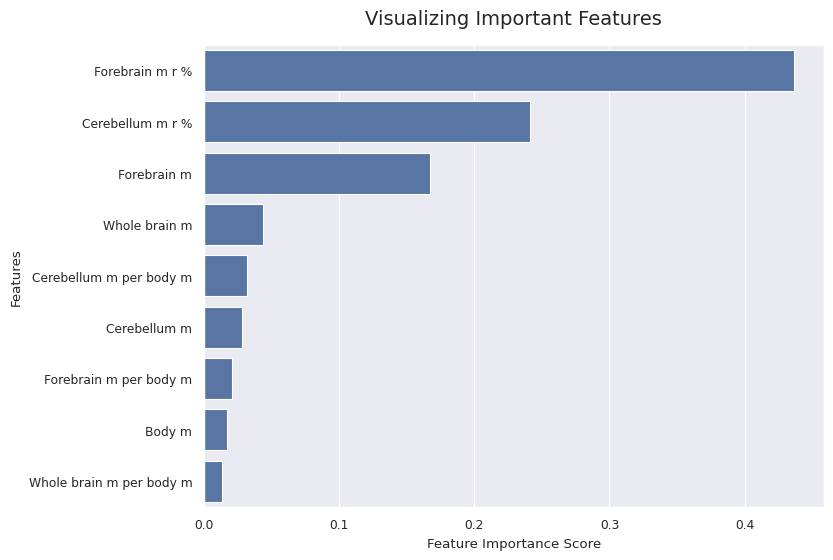

In [42]:
fig01 = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(regr_forebrain.feature_importances_, index=cols).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [43]:
regr_cerebellum = RandomForestRegressor(random_state=42)

In [44]:
regr_cerebellum.fit(x_train, y2_train)

RandomForestRegressor(random_state=42)

In [45]:
mean_squared_error(y2_test, regr_cerebellum.predict(x_test))

2881814202125051.5

In [46]:
r2_score(y2_test, regr_cerebellum.predict(x_test))

0.9088235858287304

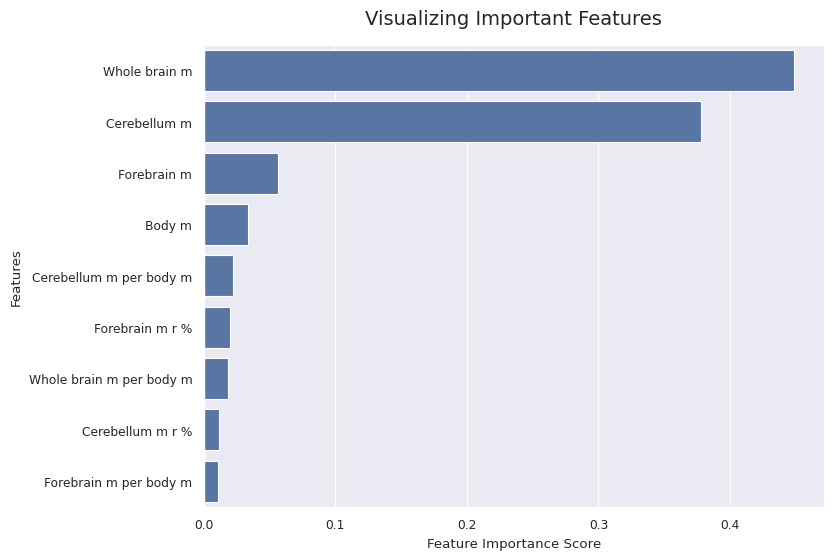

In [47]:
fig01 = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(regr_cerebellum.feature_importances_, index=cols).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [49]:
for i in range(x_train.shape[1]):
    train_feature = x_train.iloc[:,i]
    test_feature = x_test.iloc[:,i]
    regr_forebrain_one = RandomForestRegressor(random_state=42)
    regr_forebrain_one.fit(train_feature.values.reshape(-1,1), y1_train)
    print(x_train.columns[i], 'MSE = ', mean_squared_error(y1_test, regr_forebrain_one.predict(test_feature.values.reshape(-1,1))))
    print(x_train.columns[i], 'r2 = ', r2_score(y1_test, regr_forebrain_one.predict(test_feature.values.reshape(-1,1))))

Forebrain m MSE =  5.229680122938399e+16
Forebrain m r2 =  0.6391847511790941
Cerebellum m MSE =  1.7772199454943373e+17
Cerebellum m r2 =  -0.2261707059871152
Whole brain m MSE =  7.85595929360067e+16
Whole brain m r2 =  0.45798789971598
Body m MSE =  1.067138244946684e+17
Body m r2 =  0.26374129521252554
Forebrain m r % MSE =  2.6450613461454836e+16
Forebrain m r % r2 =  0.8175072957961707
Cerebellum m r % MSE =  5.2359694331675176e+16
Cerebellum m r % r2 =  0.6387508280744518
Forebrain m per body m MSE =  1.1732062885396542e+17
Forebrain m per body m r2 =  0.1905609732018536
Cerebellum m per body m MSE =  2.5969438723801635e+17
Cerebellum m per body m r2 =  -0.791728991945102
Whole brain m per body m MSE =  1.3010794499249626e+17
Whole brain m per body m r2 =  0.10233648249087679


In [50]:
for i in range(x_train.shape[1]):
    train_feature = x_train.iloc[:,i]
    test_feature = x_test.iloc[:,i]
    regr_cerebellum_one = RandomForestRegressor(random_state=42)
    regr_cerebellum_one.fit(train_feature.values.reshape(-1,1), y2_train)
    print(x_train.columns[i], 'MSE = ', mean_squared_error(y2_test, regr_cerebellum_one.predict(test_feature.values.reshape(-1,1))))
    print(x_train.columns[i], 'r2 = ', r2_score(y2_test, regr_cerebellum_one.predict(test_feature.values.reshape(-1,1))))

Forebrain m MSE =  6813011806948903.0
Forebrain m r2 =  0.784446205516629
Cerebellum m MSE =  8309017199684830.0
Cerebellum m r2 =  0.7371147685385053
Whole brain m MSE =  7322687989879179.0
Whole brain m r2 =  0.7683207916319257
Body m MSE =  1.9820126373428696e+16
Body m r2 =  0.37291999955512
Forebrain m r % MSE =  4.302839837861417e+16
Forebrain m r % r2 =  -0.36135600581118643
Cerebellum m r % MSE =  3.726933211326742e+16
Cerebellum m r % r2 =  -0.17914751691490727
Forebrain m per body m MSE =  3.1039464618349972e+16
Forebrain m per body m r2 =  0.017956438825843635
Cerebellum m per body m MSE =  3.670284926708042e+16
Cerebellum m per body m r2 =  -0.16122482274302774
Whole brain m per body m MSE =  2.7762278402472416e+16
Whole brain m per body m r2 =  0.12164184904933784


In [51]:
for i in range(3, len(Breng.columns)):
  ratio = max(Breng.iloc[:,i])/min(Breng.iloc[:,i])
  print(Breng.columns[i], 'ratio = ', ratio)

Forebrain m ratio =  145.3409090909091
Cerebellum m ratio =  145.0225
Whole brain m ratio =  112.74229691876752
Forebrain n ratio =  135.2438766146679
Cerebellum n ratio =  24.67276749330539
Whole brain n ratio =  38.96717115236462
Body m ratio =  21437.5
Forebrain m r % ratio =  1.8076956411716325
Cerebellum m r % ratio =  3.433494510191542
Forebrain n r % ratio =  5.1017548813092946
Cerebellum n r % ratio =  4.131259412614042
Forebrain n d ratio =  19.402636953376405
Cerebellum n d ratio =  9.033350258406225
Whole brain n d ratio =  11.341639757683307
Forebrain m per body m ratio =  154.34217813395884
Cerebellum m per body m ratio =  147.8218897067696
Whole brain m per body m ratio =  190.14602847275705
Forebrain n per body m ratio =  2861.851025218498
Cerebellum n per body m ratio =  1335.326905580744
Whole brain n per body m ratio =  2156.5677562922037
